In [65]:
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.applications.inception_v3 import InceptionV3
from keras.layers import Dense, Dropout
from keras.models import Sequential 
from keras import optimizers 
from sklearn.model_selection import train_test_split


In [56]:
data_iter = ImageDataGenerator(validation_split=0.2, rescale=1./255)
train_data = data_iter.flow_from_directory(directory='train', target_size=(150, 150), batch_size=128, subset='training')
val_data = data_iter.flow_from_directory(directory='train', target_size=(150, 150), batch_size=128, subset='validation')
test_iter = ImageDataGenerator(rescale=1./255)
test_data = test_iter.flow_from_directory(directory='test', target_size=(150, 150), batch_size=128)


Found 2040 images belonging to 2 classes.
Found 509 images belonging to 2 classes.
Found 972 images belonging to 2 classes.


In [57]:
inception_model = InceptionV3(include_top=False, weights='imagenet', input_shape=(150, 150, 3), pooling='max')
inception_model.trainable = False

In [58]:
model = Sequential()
model.add(inception_model)
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(2, activation='softmax'))

In [59]:
optimizer = optimizers.Adam()
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 2048)              21802784  
_________________________________________________________________
dense_6 (Dense)              (None, 200)               409800    
_________________________________________________________________
dropout_3 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 402       
Total params: 22,212,986
Trainable params: 410,202
Non-trainable params: 21,802,784
_________________________________________________________________


In [60]:
model.fit_generator(
        train_data,
        epochs=10,
        validation_data=val_data)

Epoch 1/10
16/16 [==============================] - 38s 2s/step - loss: 1.6974 - acc: 0.5909 - val_loss: 1.0142 - val_acc: 0.4519
Epoch 2/10
16/16 [==============================] - 37s 2s/step - loss: 0.5111 - acc: 0.7418 - val_loss: 1.1241 - val_acc: 0.4617
Epoch 3/10
16/16 [==============================] - 37s 2s/step - loss: 0.3793 - acc: 0.8271 - val_loss: 0.8229 - val_acc: 0.6248
Epoch 4/10
16/16 [==============================] - 37s 2s/step - loss: 0.2744 - acc: 0.8959 - val_loss: 1.7089 - val_acc: 0.4990
Epoch 5/10
16/16 [==============================] - 37s 2s/step - loss: 0.2120 - acc: 0.9240 - val_loss: 1.7948 - val_acc: 0.5403
Epoch 6/10
16/16 [==============================] - 37s 2s/step - loss: 0.1938 - acc: 0.9207 - val_loss: 0.5471 - val_acc: 0.7839
Epoch 7/10
16/16 [==============================] - 37s 2s/step - loss: 0.1499 - acc: 0.9523 - val_loss: 1.4656 - val_acc: 0.6110
Epoch 8/10
16/16 [==============================] - 37s 2s/step - loss: 0.1283 - acc: 0.95

In [61]:
model.evaluate_generator(test_data)

[1.0578556259473164, 0.7160493839424824]

In [88]:
import numpy as np

image2 = image.load_img('test/B/B1020_train.jpg', target_size=(150, 150))
image2 = image.img_to_array(image2) / 255
image2 = np.expand_dims(image2, axis=0)

model.predict(image2)

FileNotFoundError: [Errno 2] No such file or directory: 'test/B/B1020_train.jpg'

In [83]:
import matplotlib.pyplot as plt

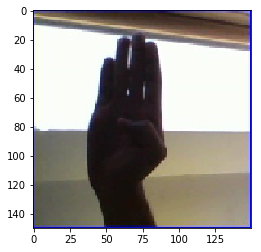

In [81]:
im, target = train_data[0]
plt.imshow(im[0])

In [50]:
im[0].min()

0.0